# Week 4 Project

Jiwei Xia

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.interpolation import shift
from scipy.stats import t, shapiro, gaussian_kde
from scipy.optimize import minimize, fsolve
import pandas as pd

In [2]:
# upload documents, run this only when using Google Colab
from google.colab import files
uploaded1 = files.upload()
uploaded2 = files.upload()
uploaded3 = files.upload()
uploaded4 = files.upload()

Saving DailyPrices.csv to DailyPrices.csv


Saving INTC.csv to INTC.csv


Saving INTC_new.csv to INTC_new.csv


Saving portfolio.csv to portfolio.csv


## Problem 1

Calculate and compare the expected value and standard deviation of price at time t 

1.1 Classical Brownian Motion:
$$P_{t} = P_{t-1} + r_{t}$$
Expectation:
$$E[P_{t}] = E[P_{t-1} + r_{t}]$$
$$E[P_{t}] = E[P_{t-1}] + E[r_{t}]$$
$$E[P_{t}] = P_{t-1}$$
Standard deviation:
$$Std[P_{t}] = Std[P_{t-1} + r_{t}]$$
$$Std[P_{t}] = Std[P_{t-1}] + Std[r_{t}]$$
$$Std[P_{t}] = \sigma$$

1.2 Arithmetic Return System:
$$P_{t} = P_{t-1}(1 + r_{t})$$
Expectation:
$$E[P_{t}] = E[P_{t-1} + P_{t-1}r_{t}]$$
$$E[P_{t}] = E[P_{t-1}] + E[P_{t-1}r_{t}]$$
$$E[P_{t}] = P_{t-1}$$
Standard deviation:
$$Std[P_{t}] = Std[P_{t-1} + P_{t-1}r_{t}]$$
$$Std[P_{t}] = Std[P_{t-1}r_{t}]$$
$$Std[P_{t}] = P_{t-1}\sigma$$

1.3 Log Return or Geometric Brownian Motion:
$$P_{t} = P_{t-1}e^{r_{t}}$$
Expectation:
$$E[ln(P_{t})] = E[ln(P_{t-1}e^{r_{t}})]$$
$$E[ln(P_{t})] = E[ln(P_{t-1})] + E[r_{t}]$$
$$E[ln(P_{t})] = ln(P_{t-1})$$
Standard deviation:
$$Std[ln(P_{t})] = Std[ln(P_{t-1}e^{r_{t}})]$$
$$Std[ln(P_{t})] = Std[ln(P_{t-1})] + Std[r_{t}]$$
$$Std[ln(P_{t})] = \sigma$$

Assume $P_{t-1} = 50$, $\sigma = 0.5$, we can get:
1. Classical Brownian Motion:
$$E[P_{t}] = 50$$
$$Std[P_{t}] = 0.5$$
2. Arithmetic Return System:
$$E[P_{t}] = 50$$
$$Std[P_{t}] = 25$$
3. Log Return or Geometric Brownian Motion:
$$E[ln(P_{t})] = ln(50) = 3.91$$
$$Std[ln(P_{t})] = 0.5$$

In [52]:
sigma = 0.5
price_prev = 50

# return
r = np.random.normal(0, sigma, 10000)

price_brownian = price_prev + r
price_arithmetic = price_prev * (1 + r)
price_log = price_prev * np.exp(r)

print(np.mean(price_brownian), np.std(price_brownian))
print(np.mean(price_arithmetic), np.std(price_arithmetic))
print(np.mean(np.log(price_log)), np.std(np.log(price_log)))

49.995860744615534 0.5048931170610959
49.79303723077689 25.24465585305479
3.9078837500436836 0.5048931170610959


We can see that the result from simulation matches our calculation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

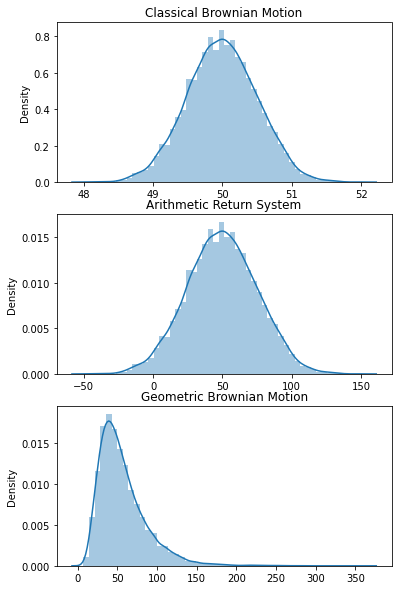

In [89]:
fig, axes = plt.subplots(3, 1, figsize=(6, 10))
sns.distplot(price_brownian, ax=axes[0])
sns.distplot(price_arithmetic, ax=axes[1])
sns.distplot(price_log, ax=axes[2])
axes[0].set_title("Classical Brownian Motion")
axes[1].set_title("Arithmetic Return System")
axes[2].set_title("Geometric Brownian Motion")
plt.show()

## Problem 2

Implement a function similar to the “return_calculate()” in this week’s code. Allow the user to specify the method of return calculation.

In [54]:
def return_calculate(prices, method="arithmetic"):
  shifted_prices = prices[:-1]
  price_change_percent = []
  for i in range(len(shifted_prices)):
    price_change_percent.append(prices[i+1] / shifted_prices[i])
  price_change_percent = np.array(price_change_percent)
  if method == "arithmetic":
    return price_change_percent - 1
  elif method == "log":
    return np.log(price_change_percent)

Use INTC.csv. Calculate the arithmetic returns for INTC. Remove the mean from the series so that the mean(INTC)=0

In [55]:
# Read in the data
intc_prices = np.genfromtxt('INTC.csv', delimiter=',')
intc_prices = np.delete(intc_prices, 0, 0)
intc_prices = np.delete(intc_prices, 0, 1)
# Calculate return
intc_return = return_calculate(intc_prices)
# Remove the mean from the series
intc_return -= intc_return.mean()

Calculate VaR for 4 different distributions.

In [56]:
def calculate_var(data, mean=0, alpha=0.05):
  return mean - np.quantile(data, alpha)

In [57]:
# VaR: normal distribution
sigma = np.std(intc_return)
simulation_norm = np.random.normal(0, sigma, 10000)
var_norm = calculate_var(simulation_norm)
print(var_norm)

0.0358494343945957


In [58]:
# VaR: normal distribution with an Exponentially Weighted variance

# calculate exponential weights
def calculate_exponential_weights(lags, lamb):
  weights = []
  for i in range(1, lags + 1):
    weight = (1 - lamb) * lamb ** (i - 1)
    weights.append(weight)
  weights = np.array(weights)
  weights = np.flip(weights)
  normalized_weights = weights / weights.sum()
  return normalized_weights

# calculate exponentially weighted covariance matrix
def calculate_ewcov(data, lamb):
  weights = calculate_exponential_weights(data.shape[1], lamb)
  error_matrix = data - data.mean(axis=1)
  ewcov = error_matrix @ np.diag(weights) @ error_matrix.T
  return ewcov

In [59]:
ew_cov = calculate_ewcov(np.matrix(intc_return).T, 0.94)
ew_variance = ew_cov[0, 0]
sigma = np.sqrt(ew_variance)
simulation_ew = np.random.normal(0, sigma, 10000)
var_ew = calculate_var(simulation_ew)
print(var_ew)

0.03855888704529717


In [60]:
# VaR: MLE fitted T distribution.
result = t.fit(intc_return, method="MLE")
df = result[0]
loc = result[1]
scale = result[2]

simulation_t = t(df, loc, scale).rvs(10000)
var_t = calculate_var(simulation_t)
print(var_t)

0.0327346066839301


In [61]:
# VaR: historic
var_hist = calculate_var(intc_return)
print(var_hist)

0.029574903865632305


Look at the empirical distribution of returns, in sample.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

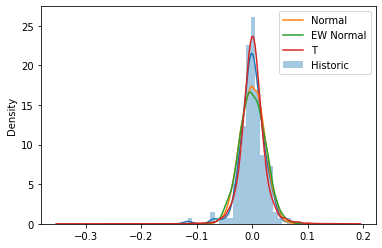

In [62]:
plt.figure()
sns.distplot(intc_return, label='Historic')
sns.distplot(simulation_norm, hist=False, label='Normal')
sns.distplot(simulation_ew, hist=False, label='EW Normal')
sns.distplot(simulation_t, hist=False, label='T')
plt.legend()
plt.show()

Download from Yahoo! Finance the prices since the end of the data in the CSV file (about 3 months). Look the empirical distribution of returns, out of sample.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

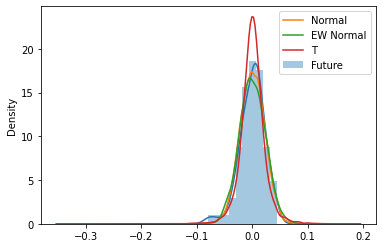

In [63]:
# Read in the data
intc_data_new = np.genfromtxt('INTC_new.csv', delimiter=',')
intc_data_new = np.delete(intc_data_new, 0, 0)
intc_data_new = np.delete(intc_data_new, 0, 1)
intc_prices_new = intc_data_new.T[3]
# Calculate return
intc_return_new = return_calculate(intc_prices_new)
# Remove the mean from the series
intc_return_new -= intc_return_new.mean()

plt.figure()
sns.distplot(intc_return_new, label='Future')
sns.distplot(simulation_norm, hist=False, label='Normal')
sns.distplot(simulation_ew, hist=False, label='EW Normal')
sns.distplot(simulation_t, hist=False, label='T')
plt.legend()
plt.show()

We can see that the T distribution best describes the historic data, while the normal distribution best describes the future data.

## Problem 3

Calculate the VaR of each portfolio as well as your total VaR (VaR of the total holdings).

In [64]:
# rewrite the return calculation function for pandas
def pd_return_calculate(prices, method="arithmetic"):
  price_change_percent = (prices / prices.shift(1))[1:]
  if method == "arithmetic":
    return price_change_percent - 1
  elif method == "log":
    return np.log(price_change_percent)

In [65]:
# load in data and calculate returns
prices = pd.read_csv("DailyPrices.csv", parse_dates=[0], index_col=0)
portfolios = pd.read_csv("portfolio.csv")
returns = pd_return_calculate(prices)

# Combine the portfolios to get a total one and append it to the end for easier 
# calculation.
total_holdings = portfolios.groupby('Stock').sum('Holding')
total_holdings['Portfolio'] = 'Total'
total_holdings = total_holdings.reset_index()
portfolios = portfolios.append(total_holdings)

First we will conduct Shapiro-Wilks test on the data and see what percentage of stocks follow normal distribution, to determine if we can assume normal distribution and use corresponding methods.

In [69]:
def shapiro_test(data, alpha=0.05):
  test_stat, p = shapiro(data)
  if p > alpha:
    return 1
  else:
    return 0

# determine if the returns are normally distributed using Shapiro-Wilks test
for portfolio_index, portfolio in portfolios.groupby('Portfolio'):
  portfolio_returns = returns[portfolio.Stock]
  num_normal = portfolio_returns.apply(shapiro_test).sum()
  percentage_normal = num_normal / portfolio_returns.shape[1] * 100
  print(str(percentage_normal) + "%")

52.77777777777778%
46.875%
59.375%
53.0%


The percentages of normally distributed returns for each portfolio are all around 50%. We cannot assume normal distribution for these portfolios. T distrubution didn't perform well for prediction in problem 2. We choose to use historic VaR for these portfolios.

In [67]:
# Calculate historic VaR.
current_prices = pd.DataFrame({"Price":prices.iloc[-1]})

for portfolio_index, portfolio in portfolios.groupby('Portfolio'):
  portfolio = portfolio.set_index('Stock')
  portfolio = portfolio.join(current_prices.loc[portfolio.index])

  current_values = portfolio['Holding'] * portfolio['Price']
  portfolio_value = current_values.sum()

  sim_returns = returns[portfolio.index]
  sim_prices = (1 + sim_returns) * portfolio['Price'].T
  sim_values = sim_prices @ portfolio['Holding']

  historic_var = calculate_var(sim_values, portfolio_value)
  print(f"Portfolio {portfolio_index}: " + str(historic_var))

Portfolio A: 5329.25419921393
Portfolio B: 5579.825670338119
Portfolio C: 3320.2194874334964
Portfolio Total: 12593.869013199


It's highly recommended to use KDE to smooth the VaR estimation when calculating historic VaR. So we will try this method as well.

In [68]:
# Calculate KDE VaR.
class KDE:
  def __init__(self, data, alpha=0.05):
    self.kde = gaussian_kde(data)
    self.alpha = alpha

  def quantile_kde(self, x):
    return self.kde.integrate_box(0, x) - self.alpha

  def calculate_var_kde(self, mean=0):
    return mean - fsolve(self.quantile_kde, x0=mean)[0]

for portfolio_index, portfolio in portfolios.groupby('Portfolio'):
  portfolio = portfolio.set_index('Stock')
  portfolio = portfolio.join(current_prices.loc[portfolio.index])

  current_values = portfolio['Holding'] * portfolio['Price']
  portfolio_value = current_values.sum()

  sim_returns = returns[portfolio.index]
  sim_prices = (1 + sim_returns) * portfolio['Price'].T
  sim_values = sim_prices @ portfolio['Holding']

  kde = KDE(sim_values)
  kde_var = kde.calculate_var_kde(portfolio_value)
  print(f"Portfolio {portfolio_index}: " + str(kde_var))

Portfolio A: 6364.898362871958
Portfolio B: 5730.94788590254
Portfolio C: 3986.1853553132387
Portfolio Total: 15427.415742295678
